## Pytorch로 선형회귀 구현

## $$ y = a + bx $$

##### 1) 기본 셋팅

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

##### 2) 변수 선언

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_label = torch.FloatTensor([[2], [4], [6]])
x_train.shape

torch.Size([3, 1])

##### 3) 가중치(weight)와 bias 초기화

In [17]:
# 가중치 W, a를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
weight = torch.zeros(1, requires_grad=True) 
bias = torch.zeros(1, requires_grad=True)

##### 4) 1차 함수 정의

$$ Y_{pred} = \text{weight} * x + bias $$

In [ ]:
y_predict = (weight * x_train) + bias
y_predict

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)

##### 5) Cost function

In [23]:
cost = torch.mean((y_label-y_predict)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


##### 6) optimizer 설정

In [ ]:
opt = optim.SGD([weight,bias], lr=0.0001)
opt.zero_grad()     # gradient를 항상 0 으로 초기화
cost.backward()     # 비용함수 미분
opt.step()          # weight, bias 업데이트

---

epoch=    0   weight.item()= 0.187 bias.item()= 0.080  cost.item()= 18.666666
epoch=  100   weight.item()= 1.746 bias.item()= 0.578  cost.item()= 0.048171
epoch=  200   weight.item()= 1.800 bias.item()= 0.454  cost.item()= 0.029767
epoch=  300   weight.item()= 1.843 bias.item()= 0.357  cost.item()= 0.018394
epoch=  400   weight.item()= 1.876 bias.item()= 0.281  cost.item()= 0.011366
epoch=  500   weight.item()= 1.903 bias.item()= 0.221  cost.item()= 0.007024
epoch=  600   weight.item()= 1.924 bias.item()= 0.174  cost.item()= 0.004340
epoch=  700   weight.item()= 1.940 bias.item()= 0.136  cost.item()= 0.002682
epoch=  800   weight.item()= 1.953 bias.item()= 0.107  cost.item()= 0.001657
epoch=  900   weight.item()= 1.963 bias.item()= 0.084  cost.item()= 0.001024
epoch= 1,000   weight.item()= 1.971 bias.item()= 0.066  cost.item()= 0.000633
epoch= 1,100   weight.item()= 1.977 bias.item()= 0.052  cost.item()= 0.000391
epoch= 1,200   weight.item()= 1.982 bias.item()= 0.041  cost.item()= 0.00

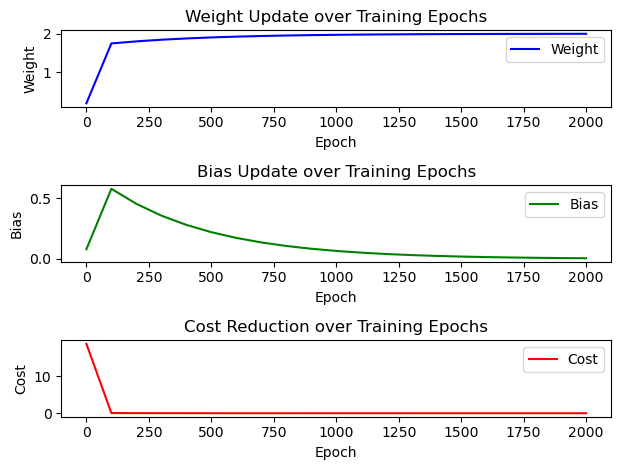

In [9]:
# 기본 세팅
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# 변수선언
x_train = torch.FloatTensor([[1.0], [2.0], [3.0]])
y_label = torch.FloatTensor([[2.0], [4.0], [6.0]])

# 모델 parameter 초기화
weight = torch.nn.Parameter(torch.zeros(1))
bias = torch.nn.Parameter(torch.zeros(1))

# Optimizer 설정
learning_rate = 0.01
opt = optim.SGD([weight,bias], lr=learning_rate)

# visualize를 위한 변수설정 
epochs = 2000
epoch_lst = []
weight_lst = []
bias_lst = []
cost_lst = []

# 트레이닝
for epoch in range(epochs+1):
    
    # y 예측값 계산
    y_predict = (weight * x_train) + bias.expand_as(x_train)
    
    # 실제 값과의 차이계산(cost)
    cost = torch.mean((y_label-y_predict)**2)
    
    # cost 로 y_predict 개선
    opt.zero_grad()     # gradient를 항상 0 으로 초기화
    cost.backward()     # 비용함수 미분
    opt.step()          # weight, bias 업데이트    

    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print(f"{epoch= :4,d}   {weight.item()= :5.3f} {bias.item()= :5.3f}  {cost.item()= :.6f}")
        epoch_lst.append(epoch)
        weight_lst.append(weight.item())
        bias_lst.append(bias.item())
        cost_lst.append(cost.item())

# weight 그래프
plt.subplot(3, 1, 1)
plt.plot(epoch_lst, weight_lst, label="Weight", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.title("Weight Update over Training Epochs")
plt.legend()

# Bias 그래프
plt.subplot(3, 1, 2)
plt.plot(epoch_lst, bias_lst, label="Bias", color="green")
plt.xlabel("Epoch")
plt.ylabel("Bias")
plt.title("Bias Update over Training Epochs")
plt.legend()

# Cost 그래프
plt.subplot(3, 1, 3)
plt.plot(epoch_lst, cost_lst, label="Cost", color="red")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Reduction over Training Epochs")
plt.legend()

plt.tight_layout()
plt.show()